## Import thư viện

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform

### Các hàm tính đại lượng thống kê cơ bản

In [4]:
def describe_clusters(self):
	return self.data.groupby('Cluster').describe()

def mean_characteristics_by_cluster(self):
	return self.data.groupby('Cluster').mean()

def plot_cluster_distributions(self):
	numerical_cols = self.data.select_dtypes(include=[np.number]).columns.drop('Cluster')
	for col in numerical_cols:
		plt.figure(figsize=(8, 4))
		sns.boxplot(x='Cluster', y=col, data=self.data, palette='Set2')
		plt.title(f'Phân bố {col} theo Cluster')
		plt.show()

## 1. Hierarchical clustering

In [5]:
class HierarchicalClustering:
	def __init__(self, csv_path: str):
		self.csv_path = csv_path
		self.data = None
		self.data_scaled = None
		self.distance_matrix = None
		self.linkage_matrix = None
		self.labels = None
		self.pca = None
		self.df_pca = None

	def load_and_preprocess(self):
		self.data = pd.read_csv(self.csv_path)
		features = self.data.select_dtypes(include=[np.number])  # giữ lại cột số
		scaler = StandardScaler()
		self.data_scaled = scaler.fit_transform(features)

		# PCA cho trực quan
		self.pca = PCA(n_components=2)
		pca_result = self.pca.fit_transform(self.data_scaled)
		self.df_pca = pd.DataFrame(pca_result, columns=["PC1", "PC2"])


	def compute_distance_matrix(self, metric='euclidean'):
		self.distance_matrix = pdist(self.data_scaled, metric=metric)


	def perform_clustering(self, method='ward'):
		self.linkage_matrix = linkage(self.distance_matrix, method=method)

	def plot_dendrogram(self):
		plt.figure(figsize=(12, 6))
		dendrogram(self.linkage_matrix)
		plt.title('Dendrogram')
		plt.xlabel('Samples')
		plt.ylabel('Distance')
		plt.show()

	def cut_tree(self, num_clusters):
		self.labels = fcluster(self.linkage_matrix, num_clusters, criterion='maxclust')
		self.data['Cluster'] = self.labels

	def visualize_clusters(self):
		df_vis = self.df_pca.copy()
		df_vis['Cluster'] = self.labels
		sns.scatterplot(data=df_vis, x="PC1", y="PC2", hue="Cluster", palette="Set2")
		plt.title("Cluster Visualization (PC1 vs PC2)")
		plt.show()

	def save_clustered_csv(self, output_path: str):
		self.data.to_csv(output_path, index=False)
		print(f"Lưu file thành công vào: {output_path}")

	def summarize_clusters(self):
		numeric_cols = self.data.select_dtypes(include=[np.number]).columns.drop('Cluster')
		summary = self.data.groupby('Cluster')[numeric_cols].mean()
		print("=== Trung bình đặc trưng số của mỗi cụm ===")
		print(summary)
		return summary


	def plot_features_by_cluster(self):
		features = self.data.select_dtypes(include=[np.number]).columns.drop('Cluster')
		for feature in features:
			plt.figure(figsize=(6, 4))
			sns.boxplot(x='Cluster', y=feature, data=self.data, hue='Cluster', palette="Set2", legend=False)
			plt.title(f"{feature} by Cluster")
			plt.tight_layout()
			plt.show()



### Demo hierarchical Clustering

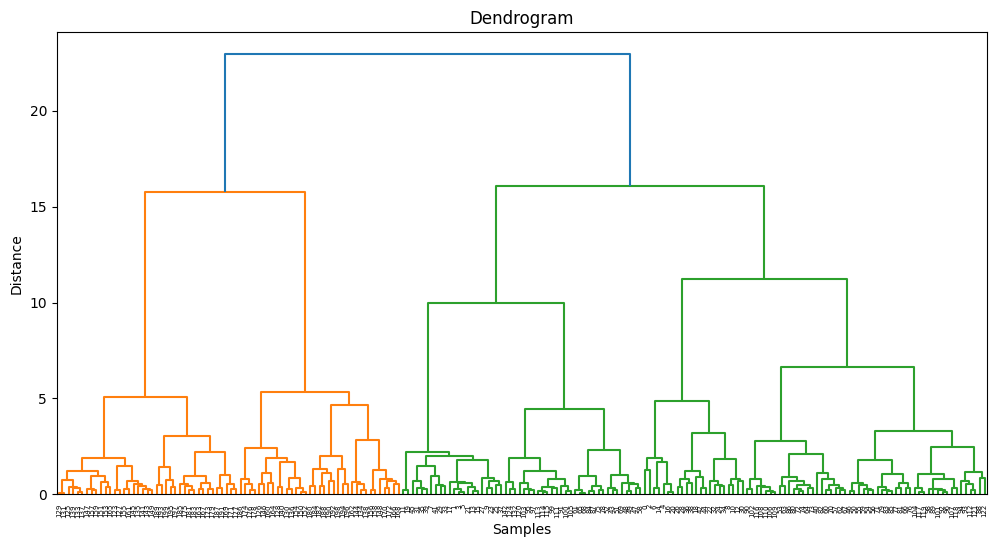

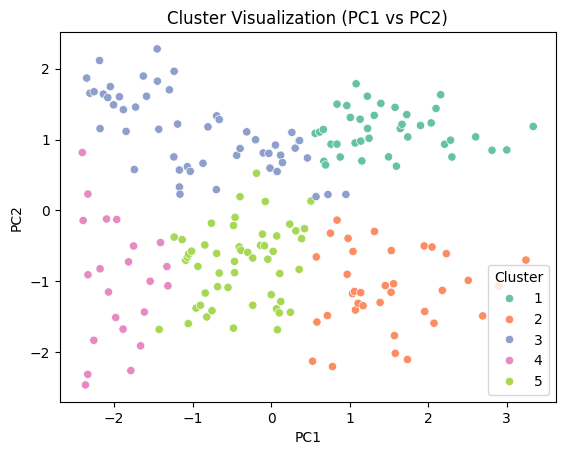

Lưu file thành công vào: Mall_Customers_Clustered.csv
=== Trung bình đặc trưng số của mỗi cụm ===
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
1        162.000000  32.692308           86.538462               82.128205
2        164.428571  41.685714           88.228571               17.285714
3         60.269231  24.653846           42.942308               62.076923
4         22.181818  44.318182           25.772727               20.272727
5         84.711538  53.442308           54.788462               49.192308


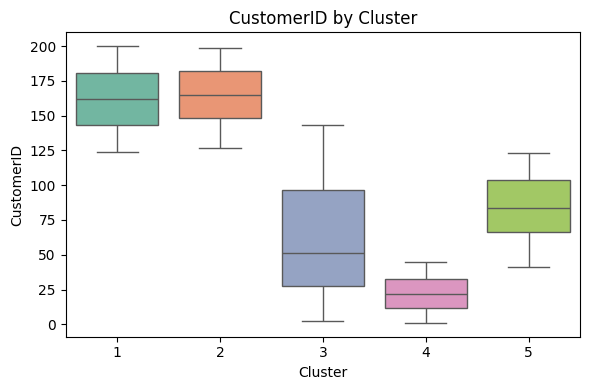

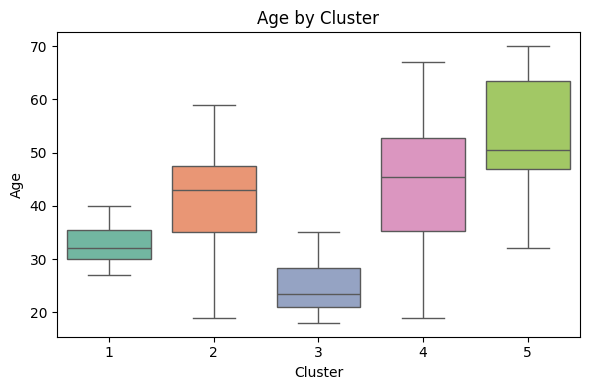

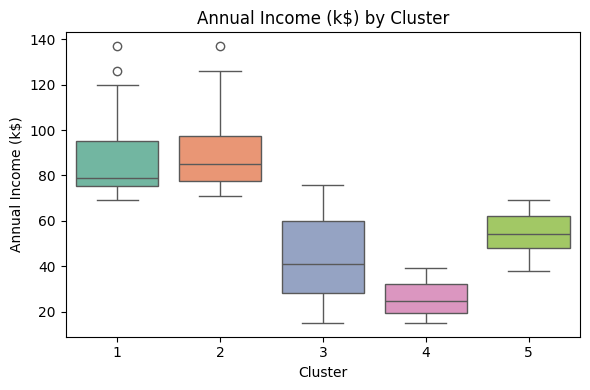

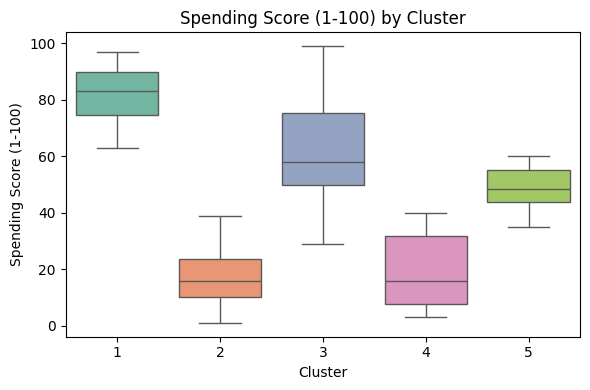

In [6]:
if __name__ == "__main__":
	# Khởi tạo đối tượng clustering
	clust = HierarchicalClustering("Mall_Customers.csv")

	# Tiền xử lý
	clust.load_and_preprocess()

	# Tính ma trận khoảng cách
	clust.compute_distance_matrix(metric='euclidean')

	# Gom cụm bằng linkage method
	clust.perform_clustering(method='ward')

	# Vẽ dendrogram để chọn số cụm
	clust.plot_dendrogram()

	# Cắt cây dendrogram để lấy nhãn cụm
	clust.cut_tree(num_clusters=5)  # bạn có thể đổi số cụm tại đây

	# Visualize cụm sau khi cắt
	clust.visualize_clusters()

	# Lưu file CSV đã gán nhãn cụm
	clust.save_clustered_csv("Mall_Customers_Clustered.csv")

	# Phân tích đặc trưng trung bình của từng cụm
	cluster_summary = clust.summarize_clusters()

	# Vẽ phân bố các đặc trưng theo cụm
	clust.plot_features_by_cluster()


## Phân tích đặc điểm các cụm khách hàng sau phân cụm (Hierarchical Clustering)

Dựa trên kết quả phân cụm bằng thuật toán Agglomerative Hierarchical Clustering (5 cụm), các đặc trưng trung bình (Age, Annual Income, Spending Score) của từng cụm được phân tích như sau:

---

### **Cluster 1**
- **Tuổi trung bình**: 32.7
- **Thu nhập hàng năm**: 86.5k USD
- **Điểm chi tiêu**: 82.1 / 100

**Đặc điểm**: Nhóm khách hàng trẻ, thu nhập cao, chi tiêu rất mạnh.  
**Chiến lược gợi ý**: Tập trung vào các chiến dịch cao cấp, thời trang, du lịch, giải trí hoặc sản phẩm công nghệ cao.

---

### **Cluster 2**
- **Tuổi trung bình**: 41.7
- **Thu nhập hàng năm**: 88.2k USD
- **Điểm chi tiêu**: 17.3 / 100

**Đặc điểm**: Khách hàng trung niên, thu nhập cao nhưng chi tiêu thấp.  
**Chiến lược gợi ý**: Hướng đến các sản phẩm tài chính, bảo hiểm, đầu tư lâu dài, hoặc tiết kiệm.

---

### **Cluster 3**
- **Tuổi trung bình**: 24.7
- **Thu nhập hàng năm**: 42.9k USD
- **Điểm chi tiêu**: 62.1 / 100

**Đặc điểm**: Khách hàng rất trẻ, thu nhập thấp nhưng có xu hướng chi tiêu cao.  
**Chiến lược gợi ý**: Tận dụng kênh mạng xã hội, quảng bá sản phẩm giá rẻ, trải nghiệm tiêu dùng hấp dẫn.

---

### **Cluster 4**
- **Tuổi trung bình**: 44.3
- **Thu nhập hàng năm**: 25.8k USD
- **Điểm chi tiêu**: 20.3 / 100

**Đặc điểm**: Khách hàng lớn tuổi, thu nhập và chi tiêu đều thấp.  
**Chiến lược gợi ý**: Không phải nhóm tiêu dùng mục tiêu cao, nhưng có thể nhắm đến các sản phẩm thiết yếu, giá rẻ, hoặc trợ giá.

---

### **Cluster 5**
- **Tuổi trung bình**: 53.4
- **Thu nhập hàng năm**: 54.8k USD
- **Điểm chi tiêu**: 49.2 / 100

**Đặc điểm**: Nhóm lớn tuổi, thu nhập trung bình, chi tiêu ở mức trung bình.  
**Chiến lược gợi ý**: Phù hợp với các sản phẩm chăm sóc sức khỏe, tiện ích gia đình, dịch vụ nghỉ dưỡng.

---

## Tóm tắt nhóm mục tiêu

| Cluster | Đặc điểm chính                                   | Gợi ý chiến lược marketing                      |
|---------|--------------------------------------------------|-------------------------------------------------|
| 1       | Trẻ, giàu, chi tiêu mạnh                         | Sản phẩm cao cấp, công nghệ, thời trang         |
| 2       | Trung niên, thu nhập cao, ít chi tiêu           | Tài chính, đầu tư, bảo hiểm                     |
| 3       | Rất trẻ, thu nhập thấp, chi tiêu cao            | Giá rẻ, mạng xã hội, trải nghiệm tiêu dùng      |
| 4       | Lớn tuổi, thu nhập thấp, chi tiêu rất thấp      | Thiết yếu, trợ giá, không phải nhóm ưu tiên     |
| 5       | Lớn tuổi, thu nhập trung bình, tiêu dùng cân bằng | Gia đình, sức khỏe, du lịch nghỉ dưỡng        |


## 2. K-means Clustering

In [13]:
class KMeansClustering:
	def __init__(self, csv_path: str):
		self.csv_path = csv_path
		self.data = None
		self.data_scaled = None
		self.kmeans_model = None
		self.labels = None
		self.pca = None
		self.df_pca = None

	def load_and_preprocess(self):
		self.data = pd.read_csv(self.csv_path)
		numeric_cols = self.data.select_dtypes(include=[np.number])
		scaler = StandardScaler()
		self.data_scaled = scaler.fit_transform(numeric_cols)

		self.pca = PCA(n_components=2)
		pca_result = self.pca.fit_transform(self.data_scaled)
		self.df_pca = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
	
	def run_kmeans(self, n_clusters=5, max_iter=100, random_state=42):
		np.random.seed(random_state)
		X = self.data_scaled
		n_samples, n_features = X.shape

		# B1: Khởi tạo K centroid ngẫu nhiên từ dữ liệu
		initial_indices = np.random.choice(n_samples, n_clusters, replace=False)
		centroids = X[initial_indices]

		for _ in range(max_iter):
			# B2: Gán mỗi điểm vào cụm gần nhất (theo Euclidean)
			distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # shape (n_samples, n_clusters)
			labels = np.argmin(distances, axis=1)

			# B3: Cập nhật lại centroid
			new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])

			# Kiểm tra hội tụ (nếu centroid không thay đổi)
			if np.allclose(centroids, new_centroids):
				break
			centroids = new_centroids

		self.labels = labels
		self.data['Cluster'] = labels

	def visualize_clusters(self):
		df_vis = self.df_pca.copy()
		df_vis['Cluster'] = self.labels
		sns.scatterplot(data=df_vis, x='PC1', y='PC2', hue='Cluster', palette='Set2')
		plt.title('K-Means Cluster Visualization (PC1 vs PC2)')
		plt.show()

	def save_clustered_csv(self, output_path: str):
		self.data.to_csv(output_path, index=False)
		print(f"Lưu file thành công vào: {output_path}")

	def summarize_clusters(self):
		numeric_cols = self.data.select_dtypes(include=[np.number]).columns.drop('Cluster')
		summary = self.data.groupby('Cluster')[numeric_cols].mean()
		print("=== Trung bình đặc trưng số của mỗi cụm ===")
		print(summary)
		return summary

	def plot_features_by_cluster(self):
		numeric_cols = self.data.select_dtypes(include=[np.number]).columns.drop('Cluster')
		for col in numeric_cols:
			plt.figure(figsize=(6, 4))
			sns.boxplot(x='Cluster', y=col, data=self.data, hue='Cluster', palette="Set2", legend=False)
			plt.title(f'{col} theo Cluster')
			plt.tight_layout()
			plt.show()


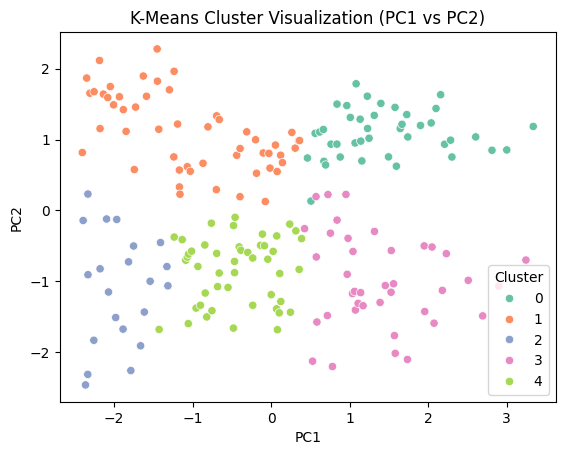

Lưu file thành công vào: Mall_Customers_KMeans.csv
=== Trung bình đặc trưng số của mỗi cụm ===
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0        160.048780  32.731707           85.634146               80.902439
1         55.365385  25.038462           41.057692               62.788462
2         23.190476  45.523810           26.285714               19.380952
3        160.974359  40.333333           86.487179               19.179487
4         82.851064  55.255319           54.063830               49.000000


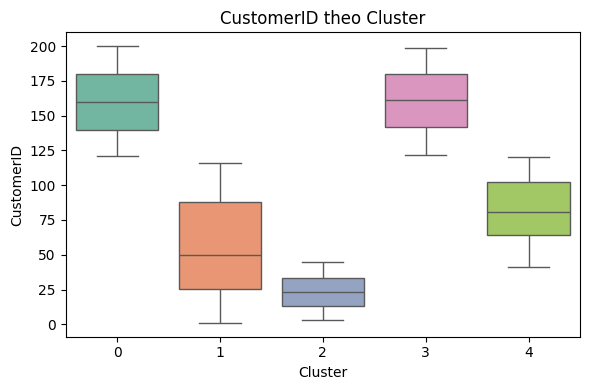

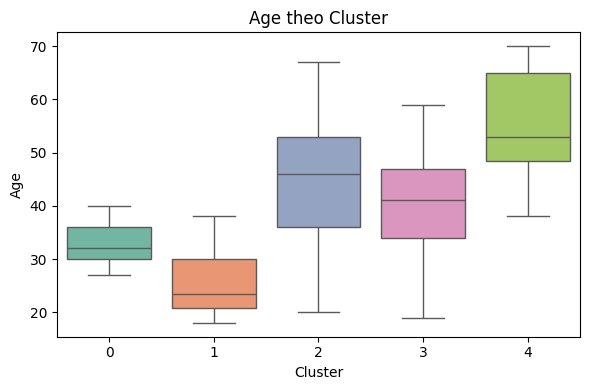

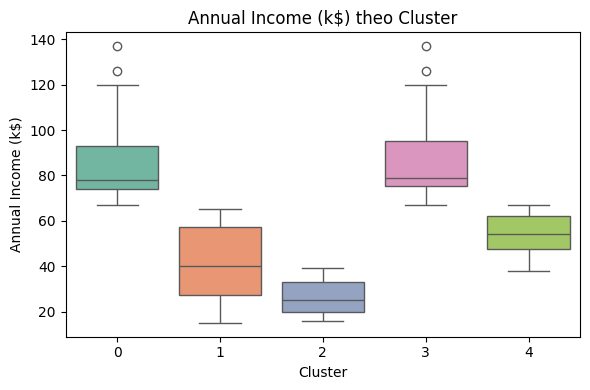

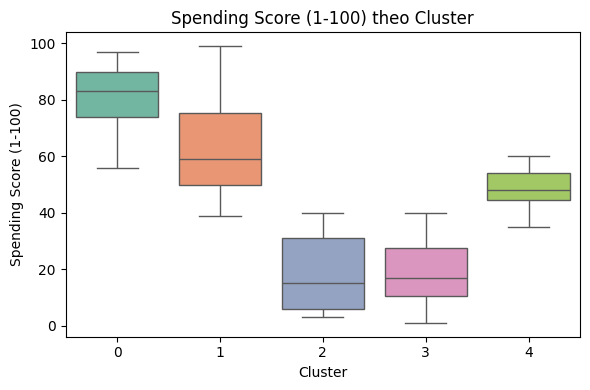

In [14]:
if __name__ == "__main__":
	# Khởi tạo đối tượng clustering
	clust = KMeansClustering("Mall_Customers.csv")

	# Bước 1: Tiền xử lý dữ liệu và PCA
	clust.load_and_preprocess()

	# Bước 2: Chạy thuật toán KMeans (cài tay)
	clust.run_kmeans(n_clusters=5)

	# Bước 3: Visualize các cụm theo PC1, PC2
	clust.visualize_clusters()

	# Bước 4: Lưu file CSV với cột Cluster
	clust.save_clustered_csv("Mall_Customers_KMeans.csv")

	# Bước 5: Phân tích trung bình đặc trưng mỗi cụm
	cluster_summary = clust.summarize_clusters()

	# Bước 6: Vẽ boxplot từng đặc trưng theo cụm
	clust.plot_features_by_cluster()


## Phân tích đặc điểm các cụm khách hàng (K-Means Clustering)

Dựa trên kết quả phân cụm bằng thuật toán K-Means, các đặc trưng trung bình của mỗi cụm được phân tích như sau:

---

### **Cluster 0**
- **Tuổi trung bình**: ~32.7
- **Thu nhập cao**: ≈ 85.6k USD
- **Chi tiêu rất cao**: ≈ 80.9/100

**Đặc điểm**: Nhóm khách hàng trẻ, thu nhập cao và có xu hướng chi tiêu rất mạnh.  
**Chiến lược gợi ý**: Tập trung vào các sản phẩm/dịch vụ cao cấp, trải nghiệm cá nhân hóa, thời trang, giải trí.

---

### **Cluster 1**
- **Tuổi trung bình**: ~25.0
- **Thu nhập thấp**: ≈ 41.1k USD
- **Chi tiêu cao**: ≈ 62.8/100

**Đặc điểm**: Khách hàng rất trẻ, thu nhập thấp nhưng sẵn sàng chi tiêu.  
**Chiến lược gợi ý**: Sản phẩm giá rẻ, chiến dịch mạng xã hội, thanh toán linh hoạt, ưu đãi theo sinh viên hoặc người mới đi làm.

---

### **Cluster 2**
- **Tuổi trung bình**: ~45.5
- **Thu nhập thấp**: ≈ 26.3k USD
- **Chi tiêu rất thấp**: ≈ 19.4/100

**Đặc điểm**: Nhóm khách hàng trung niên, thu nhập và chi tiêu đều thấp.  
**Chiến lược gợi ý**: Không phải nhóm tiêu dùng mạnh, có thể nhắm đến sản phẩm thiết yếu hoặc hỗ trợ xã hội.

---

### **Cluster 3**
- **Tuổi trung bình**: ~40.3
- **Thu nhập cao**: ≈ 86.5k USD
- **Chi tiêu thấp**: ≈ 19.2/100

**Đặc điểm**: Khách hàng trung niên, thu nhập rất cao nhưng tiêu dùng thấp.  
**Chiến lược gợi ý**: Đầu tư, bảo hiểm, dịch vụ tài chính, tiết kiệm, sản phẩm có giá trị dài hạn.

---

### **Cluster 4**
- **Tuổi trung bình**: ~55.3
- **Thu nhập trung bình**: ≈ 54.1k USD
- **Chi tiêu trung bình**: ≈ 49.0/100

**Đặc điểm**: Nhóm khách hàng lớn tuổi, tiêu dùng và thu nhập cân bằng.  
**Chiến lược gợi ý**: Phù hợp với các dịch vụ nghỉ dưỡng, chăm sóc sức khỏe, sản phẩm tiện ích gia đình.

---

## Tóm tắt cụm mục tiêu

| Cluster | Đặc điểm chính                                    | Gợi ý chiến lược marketing                          |
|---------|--------------------------------------------------|-----------------------------------------------------|
| 0       | Trẻ, thu nhập cao, chi tiêu mạnh                 | Thời trang, công nghệ, trải nghiệm cao cấp          |
| 1       | Rất trẻ, thu nhập thấp, chi tiêu cao            | Ưu đãi giá rẻ, nhắm đến sinh viên/giới trẻ           |
| 2       | Trung niên, thu nhập thấp, tiêu dùng rất thấp   | Thiết yếu, không phải mục tiêu marketing chính      |
| 3       | Trung niên, thu nhập cao, chi tiêu thấp         | Tài chính, bảo hiểm, đầu tư dài hạn                  |
| 4       | Lớn tuổi, thu nhập trung bình, chi tiêu cân bằng | Dịch vụ nghỉ dưỡng, tiện ích gia đình, sức khỏe     |
